In [1]:
from dpm.models import LinearRegression, L1Regression, RidgeRegression, LassoRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

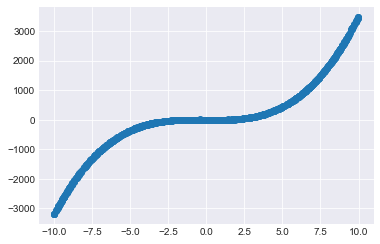

In [35]:
N = 1000

x = np.random.uniform(-10, 10, (N, 1))
x = np.concatenate((x**3, x**2, x), axis = 1)
# print(x[:, 1])
w = np.array([[3.4], [1.6], [-4.5]])
b = -4.2
y = x @ w  + b + np.random.normal(0, 4, (N, 1))
plt.scatter(x[:, 2], y); plt.show()


In [36]:
model = LassoRegression(input_dim=3, tau=10.)

In [37]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.1279,  0.0324, -0.1996], grad_fn=<ViewBackward>),
 tensor([0.3183], grad_fn=<ViewBackward>)]

In [38]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.1279,  0.0324, -0.1996,  0.3183], grad_fn=<CatBackward>)

In [39]:
stats = model.fit(x, y, epochs=10000, lr=0.1, batch_size=1024)

In [40]:
[p.view(-1) for p in model.model.parameters()]

[tensor([ 3.3998,  1.5797, -4.5397], grad_fn=<ViewBackward>),
 tensor([-3.2908], grad_fn=<ViewBackward>)]

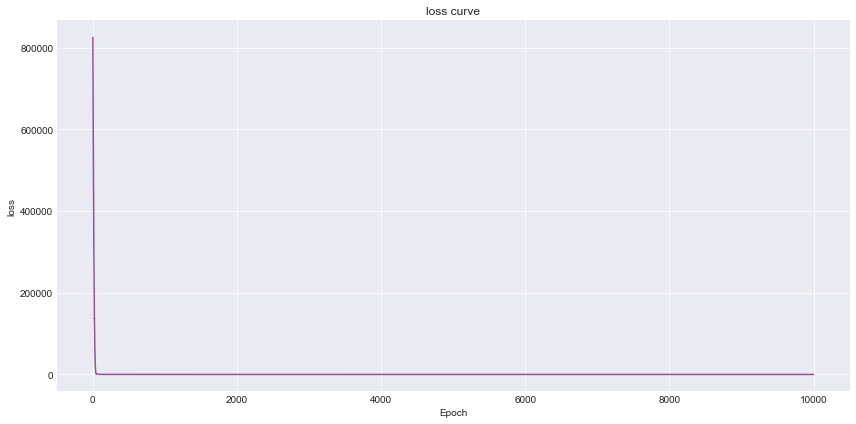

In [41]:
plot_stats(stats)

In [46]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 3.3998],
        [ 1.5797],
        [-4.5397],
        [-3.2908]], grad_fn=<ViewBackward>)

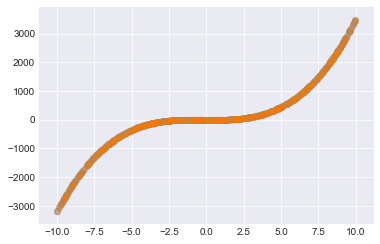

In [47]:
plt.scatter(x[:, 2], model.model.output_layers[0](torch.Tensor(x)).detach(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

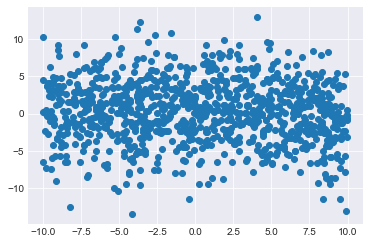

In [48]:
y_pred = model.model.output_layers[0](torch.Tensor(x)).detach()
residual = y_pred - torch.tensor(y).float()
plt.scatter(x[:, 2], residual)

In [49]:
print(residual.mean())
print(residual.var())

tensor(0.2824)
tensor(16.6286)


In [10]:
torch.Tensor(y)[:1]

tensor([[62.1217]])

In [11]:
x, y = torch.tensor(x).float(), torch.tensor(y).float()

In [12]:
model.sample(x)

tensor([[ 5.7387e+01],
        [ 1.1083e+00],
        [-9.6480e-01],
        [ 1.2156e+02],
        [ 6.6432e+00],
        [-6.8110e+00],
        [-4.6532e+00],
        [-6.0291e+00],
        [ 1.7804e+00],
        [ 1.1181e+01],
        [ 9.1147e+01],
        [ 1.7863e+02],
        [ 8.1081e+01],
        [ 8.0669e+00],
        [ 6.4127e+00],
        [ 6.1050e+00],
        [ 2.2396e+00],
        [ 1.7454e+02],
        [ 7.2036e+01],
        [ 3.2500e+01],
        [ 7.1802e+01],
        [ 1.6539e+02],
        [ 8.6842e+01],
        [-4.3752e+00],
        [ 1.5390e+02],
        [-3.2182e+00],
        [ 1.9011e+02],
        [ 5.3612e+01],
        [ 4.2644e+01],
        [ 1.7793e+02],
        [ 5.2883e+01],
        [-6.2045e+00],
        [ 1.3082e+02],
        [ 1.5815e+01],
        [ 4.0807e+01],
        [ 1.3044e+02],
        [-3.4878e-01],
        [ 1.2694e+02],
        [-2.2722e+00],
        [ 9.1074e+01],
        [-4.4558e+00],
        [ 4.9941e+01],
        [ 2.8806e+01],
        [-7